# Moore-Penrose pseudo inverse


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.


In [4]:
def my_pinv_fullSVD(A):
    U, S, Vt = la.svd(A, full_matrices=True)

    S[S > 0] = 1/S[S > 0]

    return Vt.transpose() @ la.diagsvd(S, A.shape[1], A.shape[0]) @ U.transpose()

Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.


In [5]:
def my_pinv_thinSVD(A):
    U, S, Vt = la.svd(A, full_matrices=False)
    return Vt.transpose() @ np.diag(1/S) @ U.transpose()

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).


In [7]:
A = np.random.randn(5, 4)

A_pinv_full = my_pinv_fullSVD(A)
A_pinv_thin = my_pinv_thinSVD(A)
A_pinv = np.linalg.pinv(A)

print(f"|| A_pinv - A_pinv_full || = {np.linalg.norm(A_pinv - A_pinv_full)}")
print(f"|| A_pinv - A_pinv_thin || = {np.linalg.norm(A_pinv - A_pinv_thin)}")

|| A_pinv - A_pinv_full || = 1.982448181609094e-16
|| A_pinv - A_pinv_thin || = 1.982448181609094e-16


Compare the three implementations performances through the Google Colab magic command `%timeit`.


In [8]:
%timeit np.linalg.pinv(A)

14.2 μs ± 95.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%timeit my_pinv_fullSVD(A)

16.6 μs ± 32.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%timeit my_pinv_thinSVD(A)

12.8 μs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Least-square regression


Consider the linear model

$$
y = mx + q.
$$

where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.


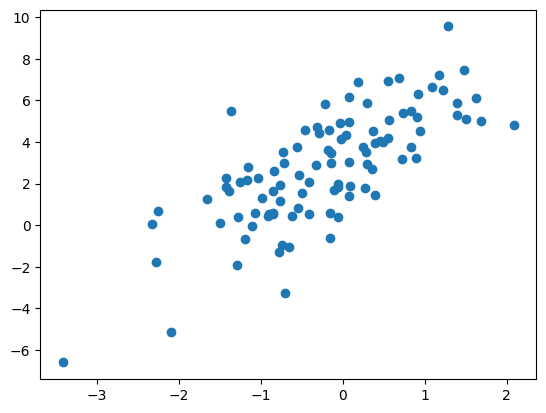

In [26]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m * X + q + noise * np.random.randn(N)

plt.scatter(X, Y)

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem

$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$

and display the regression line superimposed to the noisy data and the exact model.


In [27]:
X_pinv = my_pinv_thinSVD(np.vstack((X, np.ones(N))).T)

m_est_svd, q_est_svd = X_pinv @ Y

print(f"Estimated m: {m_est_svd}, Estimated q: {q_est_svd}")

Estimated m: 2.070250901048073, Estimated q: 3.219953410796954


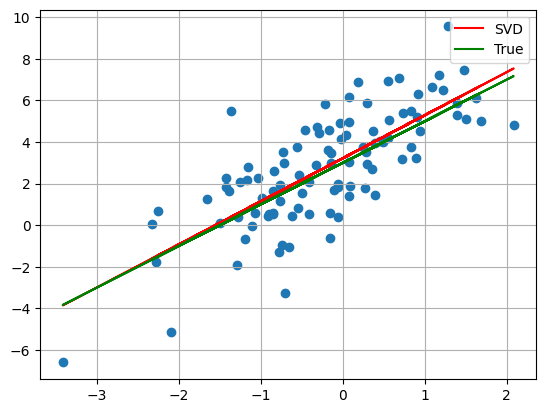

In [28]:
plt.scatter(X, Y)
plt.plot(X, m_est_svd * X + q_est_svd, color='red', label='SVD')
plt.plot(X, m * X + q, color='green', label='True')
plt.legend()
plt.grid()

Repeat the excercise by solving the normal equations. Compare the results


In [29]:
X_ext = np.vstack((X, np.ones(N))).T
m_est_normal, q_est_normal = np.linalg.inv(X_ext.T @ X_ext) @ X_ext.T @ Y
print(f"Estimated m: {m_est_normal}, Estimated q: {q_est_normal}")

Estimated m: 2.070250901048073, Estimated q: 3.219953410796955


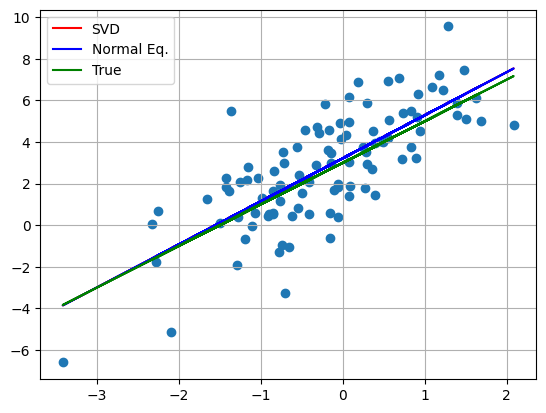

In [30]:
plt.scatter(X, Y)
plt.plot(X, m_est_svd * X + q_est_svd, color='red', label='SVD')
plt.plot(X, m_est_normal * X + q_est_normal, color='blue', label='Normal Eq.')
plt.plot(X, m * X + q, color='green', label='True')
plt.legend()
plt.grid()

# Ridge regression and Kernel regression


Consider the function

$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.


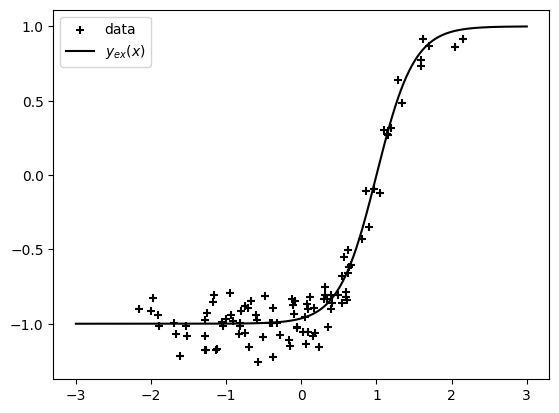

In [31]:
N = 100
noise = 0.1
def y_ex(x):
    return np.tanh(2 * (x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3, 3, N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.


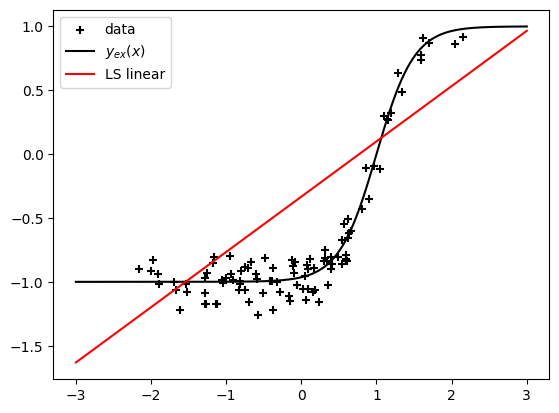

In [37]:
X_test_ext = np.vstack((X_test, np.ones(N_test))).T
X_pinv = my_pinv_thinSVD(X_test_ext)

m_est, q_est = X_pinv @ Y_test_ex

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, m_est * X_test + q_est, color="red", label="LS linear")
plt.legend()

Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.


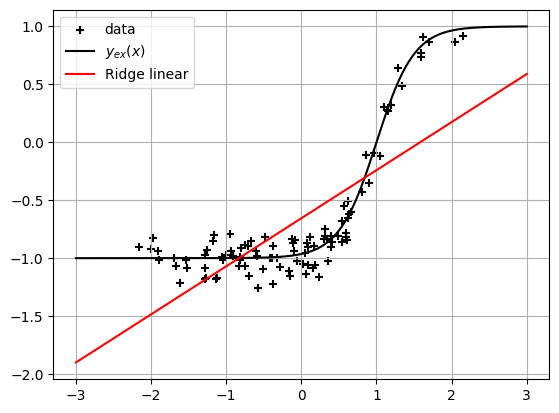

In [60]:
lam = 1.0

Phi = np.block([X[:, None], np.ones((N, 1))])

alpha = np.linalg.solve(Phi @ Phi.T + lam * np.eye(N), Y)
w = Phi.T @ alpha

Phi_test = np.block([X_test[:, None], np.ones((N_test, 1))])
Y_ridge = Phi_test @ w

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_ridge, color="red", label="Ridge linear")
plt.legend()
plt.grid()

Consider now **kernel regression**.

1. Consider first the scalar product kernel
   $$K(x_i,x_j) = x_i x_j + 1.$$
   Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
   $$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
   $$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$


In [70]:
def kernel_scalar_product(x1, x2, q=1):
    return (x1*x2+1)**q

def gaussian_kernel(x1, x2, sigma=1.0):
    return np.exp(- (x1 - x2)**2 / (2 * sigma**2))

def kernel_regression(kernel):
    K = np.array([[kernel(x1, x2) for x2 in X] for x1 in X])
    alpha = np.linalg.solve(K + lam * np.eye(N), Y)

    K_test = np.array([[kernel(x1, x2) for x2 in X] for x1 in X_test])
    Y_kr = K_test @ alpha
    return Y_kr

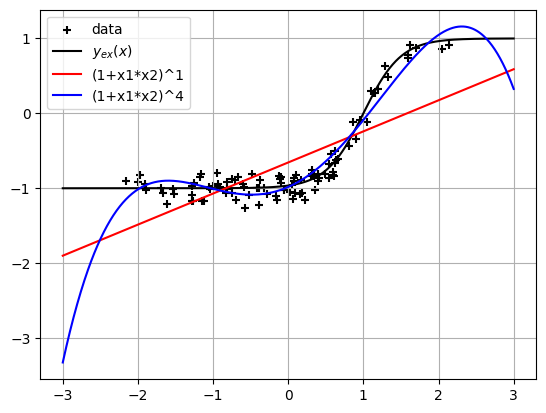

In [72]:
Y_scalar_1 = kernel_regression(lambda x1, x2: kernel_scalar_product(x1, x2, q=1))
Y_scalar_4 = kernel_regression(lambda x1, x2: kernel_scalar_product(x1, x2, q=4))

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_scalar_1, color="red", label="(1+x1*x2)^1")
plt.plot(X_test, Y_scalar_4, color="blue", label="(1+x1*x2)^4")
plt.legend()
plt.grid()

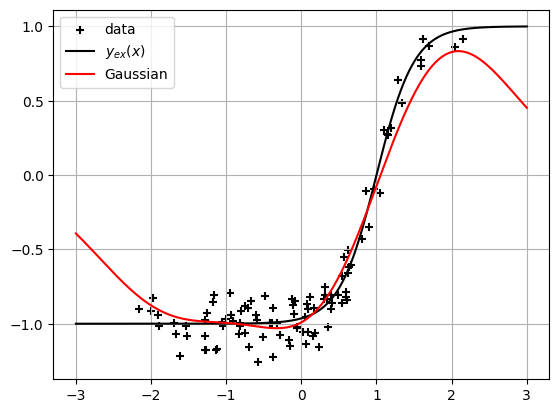

In [78]:
Y_gaussian = kernel_regression(lambda x1, x2: gaussian_kernel(x1, x2, sigma=1))


plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_gaussian, color="red", label="Gaussian")
plt.legend()
plt.grid()